# ANOVA

- T-test 는 두 집단의 평균 차이를 검정하는 방법
- 세 집단 이상의 평균을 검정할 때는 ANOVA를 사용
    - T-test를 사용하여 세 집단 이상을 분석할 때는 A와 B를 검정하고 B와 C를 검정하고 A와 C를 검정하는 방법을 사용
    - 하지만 신뢰도가 하락하는 문제가 있어 일반적으로 집단이 3개 이상일 때에는 ANOVA를 사용
    
- ANOVA의 일반적인 가설
    - H0(귀무가설) : 독립변수의 차이에 따른 종속변수는 동일하다
    - H1(대립가설) : 독립변수의 차이에 따른 종속변수는 다르다

- ANOVA는 독립변수의 수에 따라 다르게 불림
    - 예) 고객들의 객단가 평균 차이를 비교하기 위한 요인이 '지역' 하나라면 일원 분산분석(one-way ANOVA)
    - 만약 요인이 '지역', '연령대' 두 가지라면 이원 분산분석(two-way ANOVA), 더 많은 N가지라면 N원 분산분석(N-way ANOVA)라고 함
    
- ANOVA를 사용할 때는 독립변수는 집단을 나타낼 수 있는 범주형 변수여야 하며, 종속 변수는 연속형 변수여야 함
    - 독립변수와 종속변수가 연속형일 때는 회귀분석
    - 독립변수와 종속변수가 범주형일 때는 교차분석을 사용함

<img src = "./image/anova_charts.jpg">

- ANOVA는 각 집단의 평균이 서로 멀리 떨어져 있어 집단 평균의 분산이 큰 정도를 따져서 집단 간 평균이 다른지 판별
    - 집단 내 각 관측치들이 집단 평균으로부터 얼마나 퍼져있는지를 나타내는 집단 내 분산
    - 전체 집단의 통합 평균과 각 집단의 평균값이 얼마나 퍼져 있는지를 나타내는 집단 간 분산이 사용됨
- 예) 집단2와 집단 3처럼 집단간의 겹치는 부분이 큰 경우는 각 집단의 평균이 다르다고 보기 어려움
- 반면에 집단1의 평균은 멀리 떨어져 있어 집단 간 평균 차이가 확실히 난다고 볼 수 있음

- 집단 간 평균의 분산을 집단 내 분산으로 나눈 값이 유의도 임계치를 초과하는지 여부에 따라 집단 간 평균의 차이를 검정

- ANOVA 분석의 결과만으로는 각 집단의 평균이 모두 다른 것인지 일부만 다른 것인지는 알 수 없음
    - 일부 집단들은 집단간 차이가 없을 수 있음
    - 이러한 1종 오류(귀무가설이 참임에도 불구하고 귀무가설을 기각하는 오류)를 방지하기 위해 사우 검증을 수행
- 사후 검증은 집단 크기가 같을 때 사용하는 Tukey의 HSD 검증, 집단의 크기가 다를 때 사용하는 scheffe 검증 방법 등이 있음

In [1]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import ttest_ind
import pandas as pd

In [2]:
# 데이터 불러오기
df = pd.read_csv("./data/Golf_test.csv")
df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


In [5]:
# stats 패키지 아노바 검정
F_statistic, pVal = stats.f_oneway(df["TypeA_before"],
                                  df["TypeB_before"],
                                  df["TypeC_before"])
print(f"일원분산분석 결과 : F = {F_statistic:.1f}, p = {pVal:.5f}")

일원분산분석 결과 : F = 4.2, p = 0.01652


- 정규성 검정과 등분산 검정은 T-Test에서 수행했으므로 생략
- pvalue가 0.05보다 작으므로 3개 변수 중 최소한 하나의 변수는 통계적으로 유의미한 차이가 있음

In [6]:
# 데이터 재구조화
df2 = pd.melt(df)
df2 = df2[df2["variable"].isin(["TypeA_before", "TypeB_before", "TypeC_before"])]
df2.head()

,variable,value
0,TypeA_before,277
1,TypeA_before,269
2,TypeA_before,263
3,TypeA_before,266
4,TypeA_before,262


- ols 패키지 사용을 위한 전처리
- 각 골프공 조건이 개별 컬럼으로 구성되어 있기 때문에 variable 컬럼과 value 컬럼으로 재구조화

In [7]:
# ols 패키지 아노바 검정
model = ols("value ~ C(variable)", df2).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     4.220
Date:                Fri, 08 Mar 2024   Prob (F-statistic):             0.0165
Time:                        11:37:15   Log-Likelihood:                -540.00
No. Observations:                 150   AIC:                             1086.
Df Residuals:                     147   BIC:                             1095.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     268.4600      1.265    212.201      0.000     265.960     270.960
C(variable)[T.TypeB_before]     5.1400      1.789      2.873      0.005       1.604       8.676
C(variable)[T.TypeC_before]     1.9000      1.789      1.062      0.290      -1.636       5.436
==============================================================================
Omnibus:                        7.609   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                5.374
Skew:                           0.331   Prob(JB):                       0.0681
Kurtosis:                       2.351   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(variable),2.0,675.453333,337.726667,4.220169,0.016515
Residual,147.0,11763.940000,80.026803,NaN,NaN


- 앞서 수행한 ANOVA 검정과 동일한 결과
- 데이터셋의 형태에 따라 사용하기 편한 패키지를 선택하면 됨

In [10]:
# 사후검정
posthoc = pairwise_tukeyhsd(df2["value"],
                           df2["variable"],
                           alpha = 0.05)
print(posthoc)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
TypeA_before TypeB_before     5.14 0.0129  0.9038 9.3762   True
TypeA_before TypeC_before      1.9 0.5392 -2.3362 6.1362  False
TypeB_before TypeC_before    -3.24 0.1696 -7.4762 0.9962  False
---------------------------------------------------------------


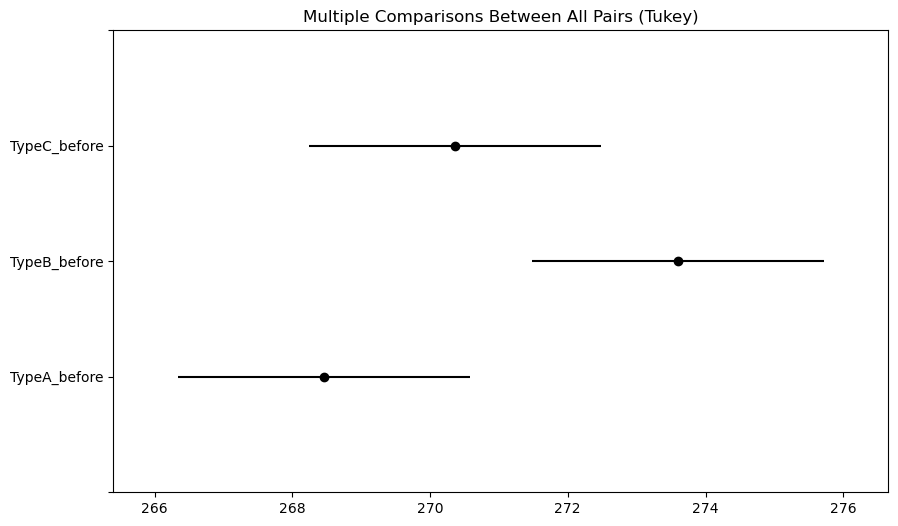

In [11]:
fig = posthoc.plot_simultaneous()

- tukey의 HSD 사후검정을 수행
- TypeA_before와 TypeB_before 간에만 유의미한 차이가 있고, 나머지는 조합에서의 통계적으로 유의미한 차이가 없음